In [1]:
# Owner: Lia Furtado

In [2]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk 
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords
import unicodedata
from collections import Counter
import spacy
import string
import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
import math
nlp = spacy.load("en_core_web_sm")

In [3]:
#nltk.download('stopwords')
#nltk.download('punkt')

### Exercice 1 : Acquisition des donnees

In [4]:

data = []
with open('dblp-ref/dblp-ref-0.json') as f:
    for line in f:
        data.append(json.loads(line))

In [5]:
data

[{'abstract': 'The purpose of this study is to develop a learning tool for high school students studying the scientific aspects of information and communication net- works. More specifically, we focus on the basic principles of network proto- cols as the aim to develop our learning tool. Our tool gives students hands-on experience to help understand the basic principles of network protocols.',
  'authors': ['Makoto Satoh',
   'Ryo Muramatsu',
   'Mizue Kayama',
   'Kazunori Itoh',
   'Masami Hashimoto',
   'Makoto Otani',
   'Michio Shimizu',
   'Masahiko Sugimoto'],
  'n_citation': 0,
  'references': ['51c7e02e-f5ed-431a-8cf5-f761f266d4be',
   '69b625b9-ebc5-4b60-b385-8a07945f5de9'],
  'title': 'Preliminary Design of a Network Protocol Learning Tool Based on the Comprehension of High School Students: Design by an Empirical Study Using a Simple Mind Map',
  'venue': 'international conference on human-computer interaction',
  'year': 2013,
  'id': '00127ee2-cb05-48ce-bc49-9de556b93346'}

In [6]:
df = pd.json_normalize(data)


In [8]:
#Filter 2016 data

data_2016 = df[(df['year'] == 2016) ]

In [9]:
data_2016

,abstract,authors,n_citation,references,title,venue,year,id
599,"In this article, we show how to compute the wi...","[Alexandr Andoni, Huy L. Nguyêݱn]",0,"[04d59cae-87b1-4706-9f5f-009ee3e94626, 228e075...",Width of Points in the Streaming Model,symposium on discrete algorithms,2016,2a68616f-ae27-46aa-8d7b-292a23e3291f
683,NaN,"[Alejandro López-Ortiz, Alejandro Salinger]",0,"[27c2d0e6-de1e-4dac-a2eb-38373b8107ce, 4891dac...",Analyzing Cache Behaviour in Multicore Archite...,,2016,30b5060e-394d-4688-ae7d-05e15209a5ae
746,Traditional methods on video summarization are...,"[Linbo Wang, Xianyong Fang, Yanwen Guo, Yanwei...",3,"[0f80ec27-572e-473b-a403-f0f7c47c4743, 18a8568...",Multi-view Metric Learning for Multi-view Vide...,cyberworlds,2016,348045c5-4d43-4c96-b106-e1038e5d4aaa
1163,NaN,"[Harald Kjellin, Terese Stenfors-Hayes]",50,NaN,PERSONAL KNOWLEDGE MANAGEMENT AS AN ICEBREAKER...,international conference on enterprise informa...,2016,5543ec00-ec14-46d5-8c11-784aa4c7636f
1789,Decision tree is an important method for both ...,"[Singh Vijendra, Hem Jyotsana Parashar, Nisha ...",0,"[6d903194-6be4-4780-9ccf-d60916e00770, 7396789...",A New Method for Classification of Datasets fo...,arXiv: Learning,2016,82f3e31c-2139-42f9-88ab-2116621eb207
...,...,...,...,...,...,...,...,...
998910,In the family of clustering problems we are gi...,"[Anudhyan Boral, Marek Cygan, Tomasz Kociumaka...",8,"[0c0d5ecf-29e2-4c04-9994-043850d8b74f, 1a5f2af...",A Fast Branching Algorithm for Cluster Vertex ...,Theory of Computing Systems \/ Mathematical Sy...,2016,4a65d0d6-d3c4-421e-9276-77dc0ba2b5af
998936,The interactive ArgTrust application is a deci...,"[Elizabeth Sklar, Simon Parsons, Zimi Li, Jord...",4,"[0119b88c-4094-4885-ad18-d6d4c9f35043, 0177b93...",Evaluation of a trust-modulated argumentation-...,Autonomous Agents and Multi-Agent Systems,2016,4a675177-b1e8-4dcc-9379-77834d90161f
999334,The parametrically guided kernel smoother is a...,"[Majda Talamakrouni, Ingrid Van Keilegom, Anou...",1,[],Parametrically guided nonparametric density an...,Computational Statistics & Data Analysis,2016,4a7e84e2-1a8f-4670-b6c8-429356787b76
999534,Supply chain planning as one of the most impor...,"[Morteza Lalmazloumian, Kuan Yew Wong, Kannan ...",50,"[0440d9f8-3801-4253-9704-c7c934b5ba54, 2319c6e...",A robust optimization model for agile and buil...,Annals of Operations Research,2016,4a8b8913-5126-4dcb-abf4-e6d3a7bdfb71


In [10]:
#Remove movies with abstract null
data_2016 = data_2016[~data_2016['abstract'].isnull()] 
#Reindex the dataframe
data_2016.reset_index(drop=True, inplace=True)


In [11]:
data_2016

,abstract,authors,n_citation,references,title,venue,year,id
0,"In this article, we show how to compute the wi...","[Alexandr Andoni, Huy L. Nguyêݱn]",0,"[04d59cae-87b1-4706-9f5f-009ee3e94626, 228e075...",Width of Points in the Streaming Model,symposium on discrete algorithms,2016,2a68616f-ae27-46aa-8d7b-292a23e3291f
1,Traditional methods on video summarization are...,"[Linbo Wang, Xianyong Fang, Yanwen Guo, Yanwei...",3,"[0f80ec27-572e-473b-a403-f0f7c47c4743, 18a8568...",Multi-view Metric Learning for Multi-view Vide...,cyberworlds,2016,348045c5-4d43-4c96-b106-e1038e5d4aaa
2,Decision tree is an important method for both ...,"[Singh Vijendra, Hem Jyotsana Parashar, Nisha ...",0,"[6d903194-6be4-4780-9ccf-d60916e00770, 7396789...",A New Method for Classification of Datasets fo...,arXiv: Learning,2016,82f3e31c-2139-42f9-88ab-2116621eb207
3,Full-reference image quality assessment (FR-IQ...,"[Ashirbani Saha, Q. M. Jonathan Wu]",50,"[02acc8f4-e6d9-4958-bd08-a1185631f22a, 108636d...",Full-reference image quality assessment by com...,Signal Processing,2016,0db3464c-7e35-4bb1-be09-f6f079258e0f
4,The Fomin-Kirillov algebra E n is a noncommuta...,[Ricky Ini Liu],1,"[7ff3b6e7-35b3-4cca-af97-c39d38bdf080, d885dd2...",On the commutative quotient of Fomin-Kirillov ...,European Journal of Combinatorics,2016,221a3099-ae5a-4e38-b793-d27d1795313f
...,...,...,...,...,...,...,...,...
11264,In the family of clustering problems we are gi...,"[Anudhyan Boral, Marek Cygan, Tomasz Kociumaka...",8,"[0c0d5ecf-29e2-4c04-9994-043850d8b74f, 1a5f2af...",A Fast Branching Algorithm for Cluster Vertex ...,Theory of Computing Systems \/ Mathematical Sy...,2016,4a65d0d6-d3c4-421e-9276-77dc0ba2b5af
11265,The interactive ArgTrust application is a deci...,"[Elizabeth Sklar, Simon Parsons, Zimi Li, Jord...",4,"[0119b88c-4094-4885-ad18-d6d4c9f35043, 0177b93...",Evaluation of a trust-modulated argumentation-...,Autonomous Agents and Multi-Agent Systems,2016,4a675177-b1e8-4dcc-9379-77834d90161f
11266,The parametrically guided kernel smoother is a...,"[Majda Talamakrouni, Ingrid Van Keilegom, Anou...",1,[],Parametrically guided nonparametric density an...,Computational Statistics & Data Analysis,2016,4a7e84e2-1a8f-4670-b6c8-429356787b76
11267,Supply chain planning as one of the most impor...,"[Morteza Lalmazloumian, Kuan Yew Wong, Kannan ...",50,"[0440d9f8-3801-4253-9704-c7c934b5ba54, 2319c6e...",A robust optimization model for agile and buil...,Annals of Operations Research,2016,4a8b8913-5126-4dcb-abf4-e6d3a7bdfb71


In [12]:
# save to csv
data_2016.to_csv('dblp_2016.csv', index=False)

### Exercice 2 : Construction d’un index sur les mots

In [13]:
data = pd.read_csv('dblp_2016.csv')  

In [14]:
#Joining the title and abstract text
data['text'] = data['title'] + ' ' + data['abstract']

#### Text Cleaning and Pre-processing

In [15]:
#Loading the stopwords
stop_words = stopwords.words('english')
stopwords_en = set(stop_words)


In [16]:
def cleanup_text(msg):
    #removing pontuation
    No_Punctuation = [char if char not in string.punctuation else ' ' for char in msg ]
    sentence = ''.join(No_Punctuation)
    #remove all non latin caracters
    sentence = re.sub(r'[^\x00-\x7f]',r'', sentence)
    #removing digits
    sentence = re.sub("\S*\d+\S*", "", sentence)
    #remove diactric accents and greek letters
    sentence = ''.join(c for c in unicodedata.normalize('NFD', sentence)
                  if unicodedata.category(c) != 'Mn')
    #### Word tokenization is the process of splitting up “sentences” into “words”
    sentence = nltk.word_tokenize(sentence)
    #Stemming the words
    #stemmer = PorterStemmer()
    return " ".join(word.lower() for word in sentence if word.lower() not in stopwords_en and len(word.lower())>1)


In [17]:
#Most 40 used words in bag of words
def clean_words(msg):
    erase_words = ['based','data', 'proposed', 'paper', 'model','method','results','time','algorithm','using','problem', \
                   'two', 'system','performance','approach','network','show','also','information','analysis','new', \
                   'used','systems', 'different','study','methods','networks','number','one','order','set','algorithms',\
                   'high','control','models','propose','learning','use','image','problems']
    
    return " ".join(char for char in word_tokenize(msg) if char not in erase_words)

In [19]:
data['text_clean'] = data['text'].apply(lambda x:cleanup_text(x))
data['text_clean'] = data['text_clean'].apply(lambda x:clean_words(x))

In [20]:
data.head()

,abstract,authors,n_citation,references,title,venue,year,id,text,text_clean
0,"In this article, we show how to compute the wi...","['Alexandr Andoni', 'Huy L. Nguyêݱn']",0,"['04d59cae-87b1-4706-9f5f-009ee3e94626', '228e...",Width of Points in the Streaming Model,symposium on discrete algorithms,2016,2a68616f-ae27-46aa-8d7b-292a23e3291f,Width of Points in the Streaming Model In this...,width points streaming article compute width d...
1,Traditional methods on video summarization are...,"['Linbo Wang', 'Xianyong Fang', 'Yanwen Guo', ...",3,"['0f80ec27-572e-473b-a403-f0f7c47c4743', '18a8...",Multi-view Metric Learning for Multi-view Vide...,cyberworlds,2016,348045c5-4d43-4c96-b106-e1038e5d4aaa,Multi-view Metric Learning for Multi-view Vide...,multi view metric multi view video summarizati...
2,Decision tree is an important method for both ...,"['Singh Vijendra', 'Hem Jyotsana Parashar', 'N...",0,"['6d903194-6be4-4780-9ccf-d60916e00770', '7396...",A New Method for Classification of Datasets fo...,arXiv: Learning,2016,82f3e31c-2139-42f9-88ab-2116621eb207,A New Method for Classification of Datasets fo...,classification datasets mining decision tree i...
3,Full-reference image quality assessment (FR-IQ...,"['Ashirbani Saha', 'Q. M. Jonathan Wu']",50,"['02acc8f4-e6d9-4958-bd08-a1185631f22a', '1086...",Full-reference image quality assessment by com...,Signal Processing,2016,0db3464c-7e35-4bb1-be09-f6f079258e0f,Full-reference image quality assessment by com...,full reference quality assessment combining gl...
4,The Fomin-Kirillov algebra E n is a noncommuta...,['Ricky Ini Liu'],1,"['7ff3b6e7-35b3-4cca-af97-c39d38bdf080', 'd885...",On the commutative quotient of Fomin-Kirillov ...,European Journal of Combinatorics,2016,221a3099-ae5a-4e38-b793-d27d1795313f,On the commutative quotient of Fomin-Kirillov ...,commutative quotient fomin kirillov algebras f...


In [21]:
data.to_csv('dblp_2016_cleaned.csv', index=False)

#### Common words and vizualization 

In [164]:
docs = [[w.lower() for w in word_tokenize(text)] 
            for text in list(data['text_clean'])]
bag_of_words = [item for sublist in docs for item in sublist]

In [165]:
len(bag_of_words)

1053474

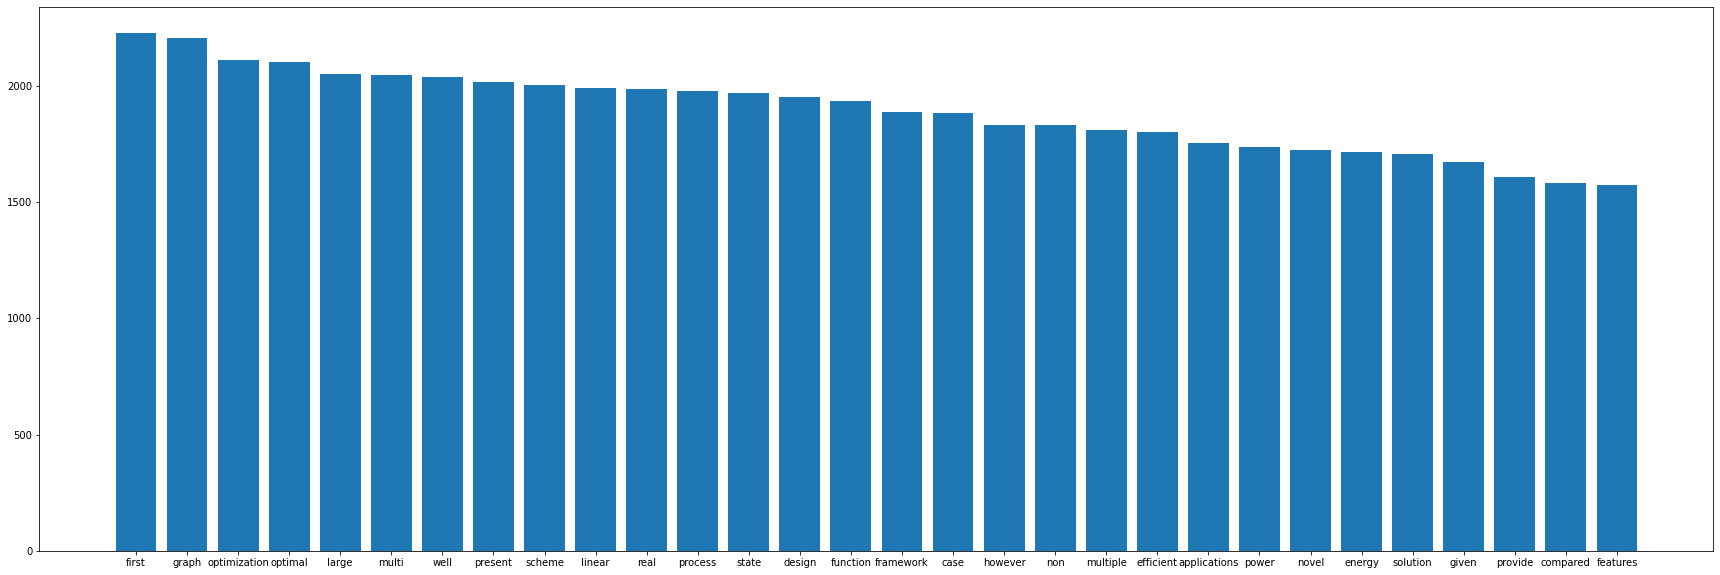

In [166]:
x=[]
y=[]
#Most common words
counter = Counter(bag_of_words)
most = counter.most_common()

for word,count in most[:30]:
        x.append(word)
        y.append(count)
plt.figure(figsize=(30,10))

plt.bar(x,y)
plt.show()

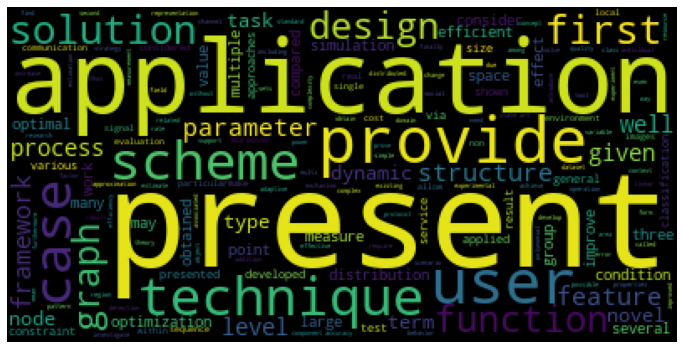

In [167]:
# Generating the wordcloud with the values under the category dataframe
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(bag_of_words))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()


In [168]:
count_vectorizer = CountVectorizer(min_df=2)
emb = count_vectorizer.fit_transform(data['text_clean'])


In [169]:
emb

<11269x18848 sparse matrix of type '<class 'numpy.int64'>'
	with 710622 stored elements in Compressed Sparse Row format>

In [170]:
vectorizer = TfidfVectorizer(min_df=2)
vectors = vectorizer.fit_transform(data['text_clean'])
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
#denselist = dense.tolist()
tfid = pd.DataFrame(dense, columns=feature_names)

In [171]:
feature_names

array(['aa', 'aaa', 'aac', ..., 'zooming', 'zs', 'zynq'], dtype=object)

In [172]:
vectorizer.vocabulary_

{'width': 18579,
 'points': 12685,
 'streaming': 16187,
 'article': 956,
 'compute': 3096,
 'dynamic': 5143,
 'low': 9816,
 'dimensional': 4600,
 'particular': 12142,
 'assume': 1065,
 'stream': 16184,
 'contains': 3395,
 'insertions': 8545,
 'deletions': 4226,
 'goal': 7179,
 'namely': 11045,
 'minimal': 10520,
 'distance': 4822,
 'parallel': 12068,
 'hyperplanes': 7949,
 'point': 12680,
 'approximates': 845,
 'space': 15757,
 'polylogarithmic': 12731,
 'size': 15517,
 'aspect': 1005,
 'ratio': 13704,
 'first': 6477,
 'supports': 16557,
 'previous': 13058,
 'approximating': 846,
 'supported': 16553,
 'additions': 227,
 'agarwal': 386,
 'et': 5814,
 'al': 455,
 'chan': 2412,
 'sliding': 15571,
 'window': 18604,
 'solves': 15709,
 'open': 11692,
 'question': 13574,
 'list': 9655,
 'streams': 16192,
 'property': 13262,
 'testing': 16986,
 'related': 14090,
 'topics': 17233,
 'multi': 10877,
 'view': 18232,
 'metric': 10400,
 'video': 18228,
 'summarization': 16481,
 'traditional': 17316,

In [173]:
tfid

,aa,aaa,aac,aam,aat,ab,abadi,abandon,abandoned,abandoning,...,zipfian,ziv,zn,znn,zone,zones,zoom,zooming,zs,zynq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Exercice 3 : Mise en place d’un moteur de recherche

In [174]:
#Setting the query
query = ["decision", "tree", "classification"]

In [175]:
#Function to get the cossine similarity between vectors
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [176]:
#Function to get euclidean distance between vectors
def get_euclidean_distance(feature_vec_1, feature_vec_2):    
    return euclidean_distances(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [177]:
def test_query_cossine_similarity(query, vectorizer):
    #getting the query and cleaning words that are not in the vocabulary
    query_string = " ".join(query)
    query_cleaned_string = clean_words(query_string)
    query = [query_cleaned_string]
    #turning the query into a vector with the same shape as the vectorizer 
    query_vec = vectorizer.transform(query)
    
    most_similars_doc = []
    
    #Comparing the query with every document in the dataset
    for index, row in data.iterrows():
        document_vec = vectorizer.transform([data['text_clean'].iloc[index]])
        value_similars = get_cosine_similarity(document_vec, query_vec)
        #Chosing the documents that have a cossine similarity higher than 0.45 with the query
        if (value_similars > 0.45):
            most_similars_doc.append({"index" : index, "document" :data['text_clean'].iloc[index], "cossine_similarity": value_similars})
        
    return most_similars_doc
    

In [178]:
#getting the most similars documents with the query
most_similars_doc = test_query_cossine_similarity(query, vectorizer)

In [179]:
most_similars_doc

[{'index': 2,
  'document': 'classification datasets mining decision tree important induction research mining mainly classification prediction widely decision tree far shortcoming inclining choose attributes many values discussed decision tree improved version attributes divided groups apply selection measure groups gain good divide attributes values groups steps done get good classification misclassification ratio classify sets accurately efficiently',
  'cossine_similarity': 0.49896064180431415},
 {'index': 991,
  'document': 'mflexdt multi flexible fuzzy decision tree stream classification many real world applications instances arrive sequentially form streams processing poses challenges machine adhering line strategies extend flexible fuzzy decision tree flexdt multiple partitioning makes possible carry automatic line fuzzy classification aimed balance accuracy tree size stream mining objective classification predict true class incoming instances real terms evaluation accuracy tree

In [180]:
most_similars_df = pd.DataFrame.from_dict(most_similars_doc, orient='columns')
most_similars_df.style.highlight_max(subset= ['cossine_similarity'] , color = 'green')

,index,document,cossine_similarity
0,2,classification datasets mining decision tree important induction research mining mainly classification prediction widely decision tree far shortcoming inclining choose attributes many values discussed decision tree improved version attributes divided groups apply selection measure groups gain good divide attributes values groups steps done get good classification misclassification ratio classify sets accurately efficiently,0.498961
1,991,mflexdt multi flexible fuzzy decision tree stream classification many real world applications instances arrive sequentially form streams processing poses challenges machine adhering line strategies extend flexible fuzzy decision tree flexdt multiple partitioning makes possible carry automatic line fuzzy classification aimed balance accuracy tree size stream mining objective classification predict true class incoming instances real terms evaluation accuracy tree depth significant factors influencing series experiments demonstrate produces optimal trees numeric nominal features variables,0.464134


#### Testing with different ponderation scheams (TF-TFIDF-CountVectorizer)

In [195]:

vectorizers = [TfidfVectorizer(min_df=2), TfidfVectorizer(min_df=2, use_idf=False)]

results = pd.DataFrame(columns = ['index', 'document', 'cossine_similarity', 'vectorizer'])

#Chosing different vectorizers to do the text similarity from the search engine
for vectorizer in vectorizers:
    vectors = vectorizer.fit_transform(data['text_clean'])
    
    most_similars_doc = test_query_cossine_similarity(query, vectorizer)
    
    results = results.append(pd.json_normalize(most_similars_doc)) 
    results.reset_index(drop=True, inplace=True)
    
    for index, row in results.iterrows():
        if (pd.isnull(results['vectorizer'].iloc[index])):
            results.loc[index, 'vectorizer'] = vectorizer

In [196]:
results

,index,document,cossine_similarity,vectorizer
0,2,classification datasets mining decision tree i...,0.498961,TfidfVectorizer(min_df=2)
1,991,mflexdt multi flexible fuzzy decision tree str...,0.464134,TfidfVectorizer(min_df=2)
2,2,classification datasets mining decision tree i...,0.560316,"TfidfVectorizer(min_df=2, use_idf=False)"
3,991,mflexdt multi flexible fuzzy decision tree str...,0.500000,"TfidfVectorizer(min_df=2, use_idf=False)"
4,1678,decision forest twenty years research decision...,0.508475,"TfidfVectorizer(min_df=2, use_idf=False)"


Comments: The simple count vector had a higher cossine similarity then TF-IDF, so we choose it to continue the search engine.

#### Testing with different vocabulary sizes

In [197]:

vectorizers = [TfidfVectorizer(min_df=2,  max_features=10000, use_idf=False), \
               TfidfVectorizer(min_df=2, max_features=1000, use_idf=False),\
              TfidfVectorizer(min_df=2, max_features=500, use_idf=False)]

results = pd.DataFrame(columns = ['index', 'document', 'cossine_similarity', 'vectorizer'])
for vectorizer in vectorizers:
    vectors = vectorizer.fit_transform(data['text_clean'])
    
    most_similars_doc = test_query_cossine_similarity(query, vectorizer)
    
    results = results.append(pd.json_normalize(most_similars_doc)) 
    results.reset_index(inplace=True, drop=True)
    
    for index, row in results.iterrows():
        if (pd.isnull(results['vectorizer'].iloc[index])):
            results.loc[index, 'vectorizer'] = vectorizer


In [198]:
results

,index,document,cossine_similarity,vectorizer
0,2,classification datasets mining decision tree i...,0.560316,"TfidfVectorizer(max_features=10000, min_df=2, ..."
1,991,mflexdt multi flexible fuzzy decision tree str...,0.502331,"TfidfVectorizer(max_features=10000, min_df=2, ..."
2,1678,decision forest twenty years research decision...,0.508475,"TfidfVectorizer(max_features=10000, min_df=2, ..."
3,2,classification datasets mining decision tree i...,0.608164,"TfidfVectorizer(max_features=1000, min_df=2, u..."
4,991,mflexdt multi flexible fuzzy decision tree str...,0.563602,"TfidfVectorizer(max_features=1000, min_df=2, u..."
5,1678,decision forest twenty years research decision...,0.587137,"TfidfVectorizer(max_features=1000, min_df=2, u..."
6,4127,customer churn mobile markets comparison techn...,0.452911,"TfidfVectorizer(max_features=1000, min_df=2, u..."
7,8310,novel random forests application classificatio...,0.482451,"TfidfVectorizer(max_features=1000, min_df=2, u..."
8,9028,dominance rough group decisions objective supp...,0.488678,"TfidfVectorizer(max_features=1000, min_df=2, u..."
9,2,classification datasets mining decision tree i...,0.757937,"TfidfVectorizer(max_features=500, min_df=2, us..."


Comments: getting a higher cossine similarity when the vocabulary size is limited to 500, because this way the data vocabulary doesn't have to many words that are rare or appear to often. 

#### Testing with the euclidean distance

In [192]:
def test_query_euclidean_similarity(query, vectorizer):
    #getting the query and cleaning words that are not in the vocabulary
    query_string = " ".join(query)
    query_cleaned_string = clean_words(query_string)
    query = [query_cleaned_string]
    #turning the query into a vector with the same shape as the vectorizer 
    query_vec = vectorizer.transform(query)
    
    old_euclidean_distance = 100
    old_index = 0
    most_similars_doc = []
    for index, row in data.iterrows():
        document_vec = vectorizer.transform([data['text_clean'].iloc[index]])
        euclidean_distance = get_euclidean_distance(document_vec, query_vec)
        if (euclidean_distance < old_euclidean_distance):
            old_euclidean_distance = euclidean_distance
            old_index = index
    most_similars_doc.append({"index" : old_index, "document" :data['text_clean'].iloc[old_index], "euclidean_similarity": old_euclidean_distance})
    return most_similars_doc

In [193]:
most_similar_doc_euclidean = test_query_euclidean_similarity(query, vectorizer)

In [194]:
most_similar_doc_euclidean

[{'index': 2,
  'document': 'classification datasets mining decision tree important induction research mining mainly classification prediction widely decision tree far shortcoming inclining choose attributes many values discussed decision tree improved version attributes divided groups apply selection measure groups gain good divide attributes values groups steps done get good classification misclassification ratio classify sets accurately efficiently',
  'euclidean_similarity': 0.695792025019162}]

Comments: comparing with text by using the euclidean distance is hard because there is no reference values 
    and the distance is not always accurate in high dimensions.

<span style="color:blue">Search Engine: From the tests the best search engine that found documents similars to the query used a TF model with cossine similarity limiting the vocabulary size, taking out the less used words, the stop words and the most commom words. </span>